In [ ]:
import numpy as np 
import pandas as pd 
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('axes', unicode_minus=False)

In [ ]:
np.random.seed(1234)
random.seed(1234)

In [ ]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data  = pd.read_csv("/kaggle/input/titanic/test.csv")
sub_data   = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [ ]:
all_in_one_ds = pd.concat([train_data,test_data],sort=False).reset_index(drop=True)
all_in_one_ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
all_in_one_ds.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

****Handling Missing Values**

In [ ]:
#Fare
mean_pclass1 = all_in_one_ds.groupby('Pclass')['Fare'].transform(lambda x: x.mean())
all_in_one_ds['Fare'].fillna(mean_pclass1, inplace=True)
#Age > mean(Pclass)
mean_pclass2 = all_in_one_ds.groupby('Pclass')['Age'].transform(lambda x: x.mean())
all_in_one_ds['Age'].fillna(mean_pclass2, inplace=True)
#Cabin
all_in_one_ds = all_in_one_ds.drop(["Cabin"], axis=1)

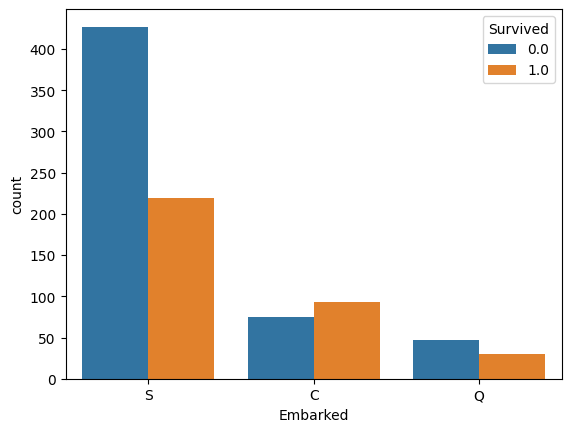

In [ ]:
#Embarked
sns.countplot(data=all_in_one_ds, x='Embarked', hue='Survived')
all_in_one_ds['Embarked'].fillna('S',inplace=True)                 #mode

In [ ]:
all_in_one_ds.isnull().sum() #after handling nulls

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

**CREATE New COLUMNS**

In [ ]:
name_df = all_in_one_ds['Name'].str.split("[,.]", n=2, expand=True)
name_df.columns = ["family_name", "honorific","name"]

In [ ]:
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

In [ ]:
all_in_one_ds = pd.concat([all_in_one_ds,name_df], axis  =1) #concating new columns into all data
all_in_one_ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,24.816367,0,0,A.5. 3236,8.0500,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,24.816367,0,0,359309,8.0500,S,Ware,Mr,Frederick


In [ ]:
train_data = pd.concat([train_data, name_df[0:len(train_data)].reset_index(drop=True)], axis=1)
test_data = pd.concat([test_data, name_df[len(train_data):].reset_index(drop=True)], axis=1)

<Axes: xlabel='honorific'>

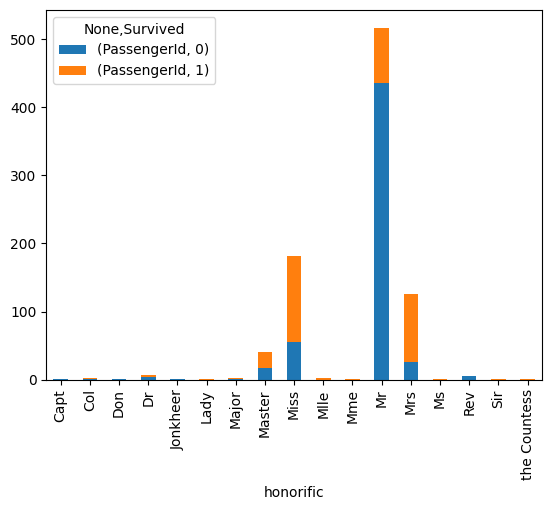

In [ ]:
honorific_df = train_data[["honorific", "Survived","PassengerId"]].dropna().groupby(["honorific", "Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True) #stacked bar chart

In [ ]:
honorific_age_mean = all_in_one_ds[["honorific", "Age"]].groupby('honorific').mean().reset_index()
honorific_age_mean.columns = ["honorific", "honorific_Age"]
all_in_one_ds = pd.merge(all_in_one_ds, honorific_age_mean, on = 'honorific', how = 'left')
all_in_one_ds.loc[(all_in_one_ds["Age"].isnull()),"Age"] = all_in_one_ds["honorific_Age"]
all_in_one_ds = all_in_one_ds.drop(['honorific_Age'],axis = 1)

In [ ]:
all_in_one_ds["family_num"] = all_in_one_ds["Parch"] + all_in_one_ds['SibSp']
all_in_one_ds["family_num"].value_counts()

family_num
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

In [ ]:
all_in_one_ds['honorific'].value_counts()

honorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [ ]:
all_in_one_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
 11  family_name  1309 non-null   object 
 12  honorific    1309 non-null   object 
 13  name         1309 non-null   object 
 14  family_num   1309 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


In [ ]:
#Mile, Ms -> Miss(1), Mme, Lady, Countness, Dona -> Mrs(2), Major, Col, Sir, Don, Jockheer, Capt -> Mr(0)
title_mapping={ 
    'Don':0,'Rev':0,'Capt':0,'Jonkheer':0,'Mr':0,'Dr':0,'Major':0,'Col':0,'Master':0,'Sir':0,
    'Miss':1,'Mlle':1,'Ms':1,'Mrs':2,'Mme':2,'Lady':2,'the Countess':2, 'Dona':2
}
all_in_one_ds['honorific']=all_in_one_ds['honorific'].map(title_mapping)

In [ ]:
# male:1, female:0
all_in_one_ds['Sex'] = all_in_one_ds['Sex'].replace({'male': 1, 'female': 0})
# S:0, C:1, Q:2
all_in_one_ds['Embarked'] = all_in_one_ds['Embarked'].replace({'S': 0, 'C': 1, 'Q':2})

In [ ]:
#Remove unnecessary values
all_in_one_ds = all_in_one_ds.drop(["PassengerId", "Name", "family_name", "name", "Ticket"], axis=1)

In [ ]:
train_X = all_in_one_ds[~all_in_one_ds["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)
train_Y = train_data['Survived']
test_X = all_in_one_ds[all_in_one_ds["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
all_in_one_ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num
0,0.0,3,0,22.000000,1,0,7.2500,0,0,1
1,1.0,1,1,38.000000,1,0,71.2833,1,2,1
2,1.0,3,1,26.000000,0,0,7.9250,0,1,0
3,1.0,1,1,35.000000,1,0,53.1000,0,2,1
4,0.0,3,0,35.000000,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,24.816367,0,0,8.0500,0,0,0
1305,NaN,1,1,39.000000,0,0,108.9000,1,2,0
1306,NaN,3,0,38.500000,0,0,7.2500,0,0,0
1307,NaN,3,0,24.816367,0,0,8.0500,0,0,0
